## K-Nearest Neighbours (KNN)

Unlike Logistic Regression, the prediction boundary is **not straight line** but **curve**.
* Might be more accurate, but might be prone to overfitting.

<img src='../../resources/classification/knn/graph.png' />

### Steps of building KNN

1. Choose the number K of neighbours. (Common value is 5)
2. Take the K nearest neighbours of the new data point, according to the Euclidean distance.
3. Among these K neighbours, count the number of each data points in each category.
4. Assign the new data points to the category where you counted the most neighbours.
5. **Model is ready**

<img src='../../resources/classification/knn/step1.png' />
<img src='../../resources/classification/knn/euclidean_dist.png' />
<img src='../../resources/classification/knn/step4.png' />

<hr/>

### Implementing KNN model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

In [3]:
df = pd.read_csv('data/social_Network_ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
X = df.drop('Purchased', axis=1).values
y = df['Purchased'].values

### Splitting Data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) # Use training sc to make test set the same scale

### Training the model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

cls.fit(X_train_sc, y_train)

KNeighborsClassifier()

### Predicting test results

In [18]:
y_preds = cls.predict(X_test_sc)
y_preds

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### Evaluations

In [20]:
# np.set_printoptions(precision=2)
print(np.concatenate((y_preds.reshape(len(y_preds), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
print(cm)

[[46  4]
 [ 3 27]]


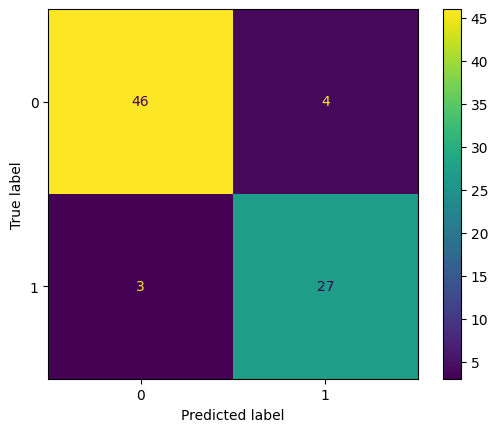

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

In [23]:
accuracy_score(y_test, y_preds)

0.9125

In [24]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.87      0.90      0.89        30

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [25]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.938776,0.870968,0.9125,0.904872,0.913348
recall,0.920000,0.900000,0.9125,0.910000,0.912500
f1-score,0.929293,0.885246,0.9125,0.907269,0.912775
support,50.000000,30.000000,0.9125,80.000000,80.000000
